<a href="https://colab.research.google.com/github/Psychoad/ECG-heartbeat-classification/blob/master/Cardiovascular_Disease%7C_EDA%7C_ANN_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
akshatshaw7_cardiovascular_disease_dataset_path = kagglehub.dataset_download('akshatshaw7/cardiovascular-disease-dataset')

print('Data source import complete.')


Data source import complete.


# **Cardiovascular Disease Prediction using Artificial Neural Network (ANN)**

This model is designed to predict the likelihood of cardiovascular disease based on a variety of health-related features. The dataset includes key attributes such as:

1. Height (cm)
2. Weight (kg)
3. Systolic Blood Pressure (ap_hi)
4. Diastolic Blood Pressure (ap_lo)
5. Age in Years
6. Gender
7. Cholesterol Levels
8. Glucose Levels
9. Smoking Habits
10. Alcohol Consumption
11. Physical Activity

The model is built using an Artificial Neural Network (ANN) and leverages these features to predict the presence or absence of cardiovascular disease (the target variable, cardio). The features were carefully processed, including the handling of outliers and transformations to ensure the best possible model performance. The goal is to assist in the early detection of cardiovascular conditions, enabling better prevention and management strategies.

This project is a step towards integrating machine learning into healthcare, providing a tool that can help in predicting and potentially reducing the risk of cardiovascular diseases through data-driven insights.

In [6]:
#Importing Important Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score

import warnings
warnings.filterwarnings('ignore')

In [8]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub

# Download the dataset and get the local path
akshatshaw7_cardiovascular_disease_dataset_path = kagglehub.dataset_download('akshatshaw7/cardiovascular-disease-dataset')

# Construct the full path to the CSV file
# Assuming 'health_data.csv' is at the root of the downloaded dataset
health_data_path = f'{akshatshaw7_cardiovascular_disease_dataset_path}/health_data.csv'

# Verify if the file exists
import os
if os.path.exists(health_data_path):
    print(f"File found at: {health_data_path}")
else:
    print(f"File not found at: {health_data_path}")
    print("Please check if 'health_data.csv' exists in the downloaded dataset directory.")

# Now read the CSV file using the corrected path
df = pd.read_csv(health_data_path)

print('Data source import complete.')

File found at: /root/.cache/kagglehub/datasets/akshatshaw7/cardiovascular-disease-dataset/versions/1/health_data.csv
Data source import complete.


In [9]:
df.head()

,Unnamed: 0,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0.0,18393.0,1,168.0,62.0,110.0,80.0,0,0,0,0,1,0
1,1,1.0,20228.0,0,156.0,85.0,140.0,90.0,2,0,0,0,1,1
2,2,2.0,18857.0,0,165.0,64.0,130.0,70.0,2,0,0,0,0,1
3,3,3.0,17623.0,1,169.0,82.0,150.0,100.0,0,0,0,0,1,1
4,4,4.0,17474.0,0,156.0,56.0,100.0,60.0,0,0,0,0,0,0


In [10]:
df.shape

(70000, 14)

# **Cleaning The Data**

In [11]:
df.drop(columns=['Unnamed: 0', 'id'],inplace=True)

In [12]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393.0,1,168.0,62.0,110.0,80.0,0,0,0,0,1,0
1,20228.0,0,156.0,85.0,140.0,90.0,2,0,0,0,1,1
2,18857.0,0,165.0,64.0,130.0,70.0,2,0,0,0,0,1
3,17623.0,1,169.0,82.0,150.0,100.0,0,0,0,0,1,1
4,17474.0,0,156.0,56.0,100.0,60.0,0,0,0,0,0,0


In [13]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,0.349571,164.359229,74.205690,128.817286,96.630414,0.366871,0.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,0.000000,55.000000,10.000000,-150.000000,-70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,0.000000,159.000000,65.000000,120.000000,80.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,0.000000,165.000000,72.000000,120.000000,80.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,1.000000,170.000000,82.000000,140.000000,90.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,1.000000,250.000000,200.000000,16020.000000,11000.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
#Removing Extreme values to set biologically relevent range for diastolic blood pressure and systolic blood pressure

df = df[(df['ap_hi'] > 0) & (df['ap_lo'] > 0)]
df = df[(df['ap_hi'] < 300) & (df['ap_lo'] < 300)]

df['ap_hi'] = df['ap_hi'].apply(lambda x: 90 if x < 90 else (180 if x > 180 else x))
df['ap_lo'] = df['ap_lo'].apply(lambda x: 60 if x < 60 else (120 if x > 120 else x))

print(df[['ap_hi', 'ap_lo']].describe())

              ap_hi         ap_lo
count  68985.000000  68985.000000
mean     126.465913     81.354976
std       16.489096      9.458136
min       90.000000     60.000000
25%      120.000000     80.000000
50%      120.000000     80.000000
75%      140.000000     90.000000
max      180.000000    120.000000


In [15]:
#Optimizing other features as well

df['age_years'] = df['age']/365
df['age_years'] = df['age_years'].apply(lambda x: 40 if x<40 else (80 if x>80 else x))
df['weight'] = df['weight'].apply(lambda x: 40 if x < 40 else (120 if x > 120 else x))
df['height'] = df['height'].apply(lambda x: 140 if x < 140 else (190 if x > 190 else x))

print(df[['age_years', 'weight']].describe())

          age_years        weight
count  68985.000000  68985.000000
mean      53.334256     74.026556
std        6.743984     13.908092
min       40.000000     40.000000
25%       48.372603     65.000000
50%       53.975342     72.000000
75%       58.419178     82.000000
max       64.967123    120.000000


In [16]:
df.shape

(68985, 13)

In [17]:
df.drop(columns=['age'],inplace=True)

In [18]:
df.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,1,168.0,62.0,110.0,80.0,0,0,0,0,1,0,50.391781
1,0,156.0,85.0,140.0,90.0,2,0,0,0,1,1,55.419178
2,0,165.0,64.0,130.0,70.0,2,0,0,0,0,1,51.663014
3,1,169.0,82.0,150.0,100.0,0,0,0,0,1,1,48.282192
4,0,156.0,56.0,100.0,60.0,0,0,0,0,0,0,47.873973


<Axes: >

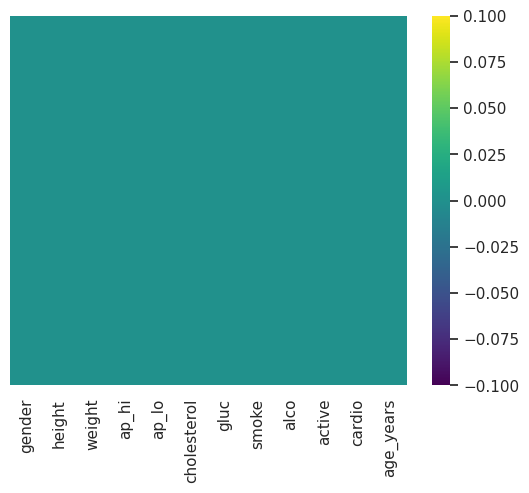

In [19]:
#Lets check for null values
sns.heatmap(df.isnull(), yticklabels=False, cmap='viridis')

In [20]:
#Function to remove outliers, we are removing the values after +-3 Standard deviation in a normal distribution.

def remove_outliers(df, column_name):

    if column_name not in df.columns:
        raise ValueError(f"Column '{column_name}' not found in the DataFrame.")

    mean_value = df[column_name].mean()
    std_value = df[column_name].std()

    outliers = df[(df[column_name] < mean_value - 3 * std_value) | (df[column_name] > mean_value + 3 * std_value)]
    print(f"\nNumber of outliers in the '{column_name}' column: {len(outliers)}")

    df_filtered = df[(df[column_name] >= mean_value - 3 * std_value) & (df[column_name] <= mean_value + 3 * std_value)]

    print(f"Original DataFrame shape: {df.shape}")
    print(f"DataFrame shape after removing outliers: {df_filtered.shape}")

    return df_filtered

In [21]:
features = ['height', 'weight', 'ap_hi', 'ap_lo', 'age_years']

for feature in features:
    df_filtered = remove_outliers(df, feature)


Number of outliers in the 'height' column: 385
Original DataFrame shape: (68985, 12)
DataFrame shape after removing outliers: (68600, 12)

Number of outliers in the 'weight' column: 764
Original DataFrame shape: (68985, 12)
DataFrame shape after removing outliers: (68221, 12)

Number of outliers in the 'ap_hi' column: 902
Original DataFrame shape: (68985, 12)
DataFrame shape after removing outliers: (68083, 12)

Number of outliers in the 'ap_lo' column: 729
Original DataFrame shape: (68985, 12)
DataFrame shape after removing outliers: (68256, 12)

Number of outliers in the 'age_years' column: 0
Original DataFrame shape: (68985, 12)
DataFrame shape after removing outliers: (68985, 12)


In [22]:
df_filtered.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,1,168.0,62.0,110.0,80.0,0,0,0,0,1,0,50.391781
1,0,156.0,85.0,140.0,90.0,2,0,0,0,1,1,55.419178
2,0,165.0,64.0,130.0,70.0,2,0,0,0,0,1,51.663014
3,1,169.0,82.0,150.0,100.0,0,0,0,0,1,1,48.282192
4,0,156.0,56.0,100.0,60.0,0,0,0,0,0,0,47.873973


# **Exploring The Data**

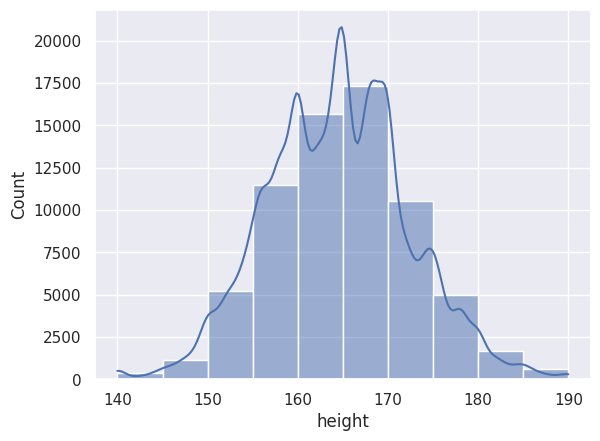

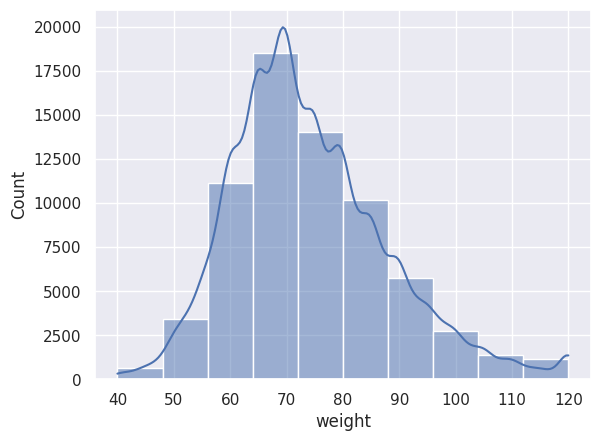

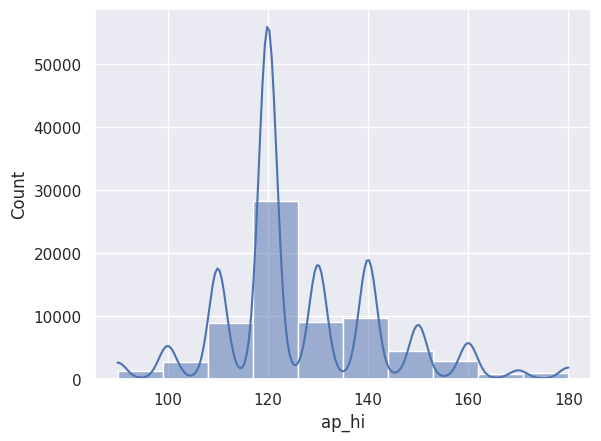

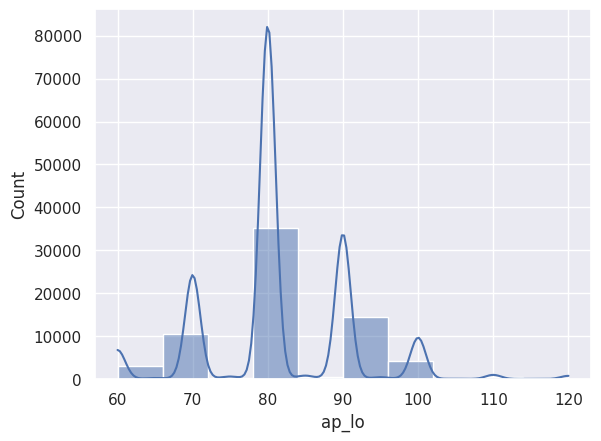

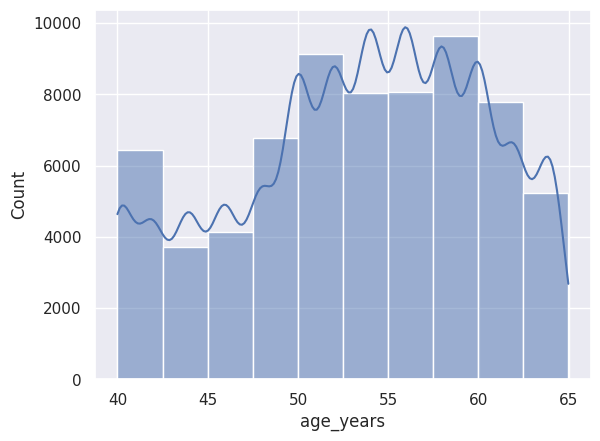

In [23]:
#Checking the distibution of continuous features
for feature in features:
    sns.histplot(df_filtered[feature], kde=True,bins=10)
    plt.show()

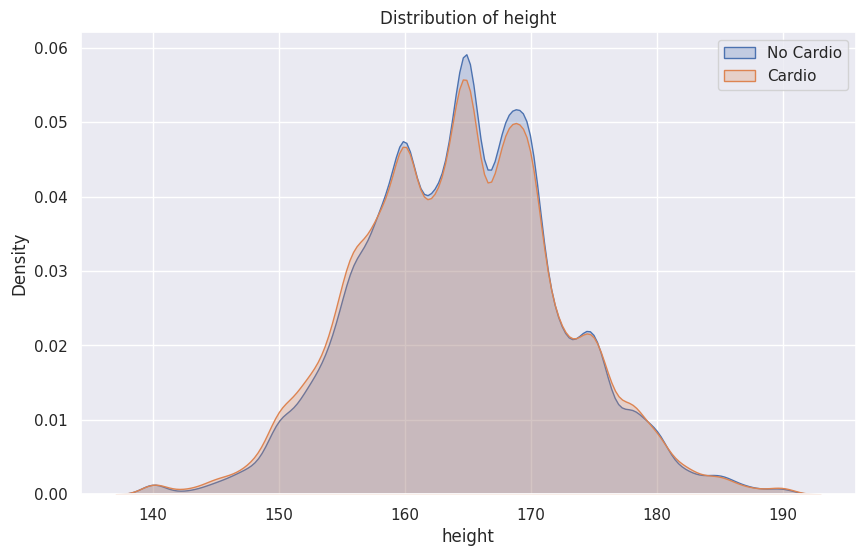

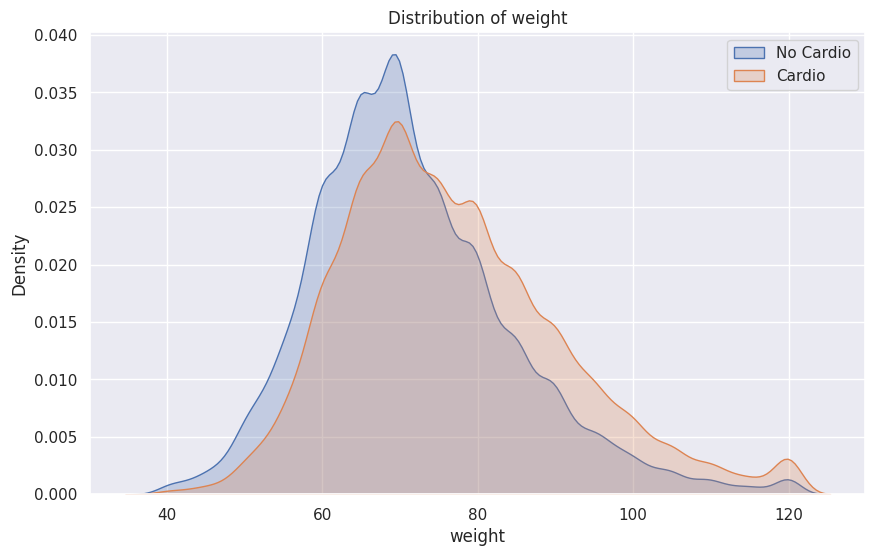

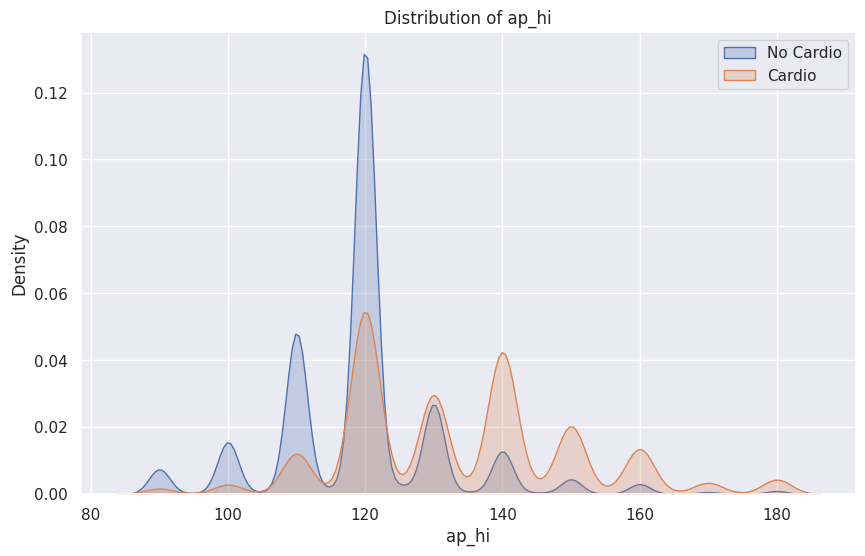

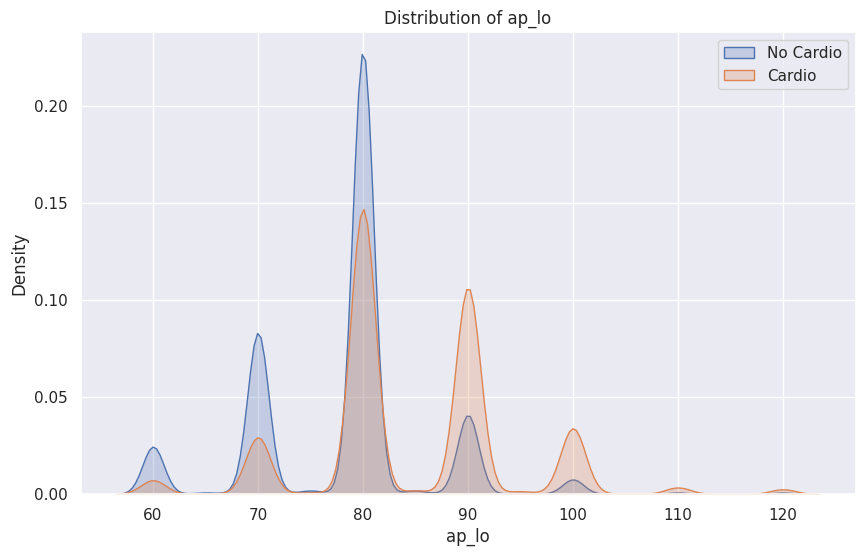

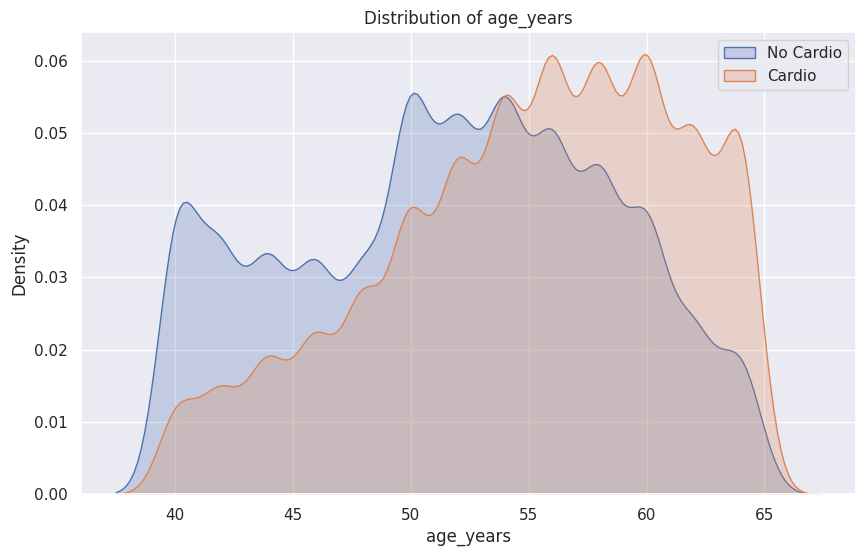

In [24]:
#Checking the disribution each continuous variable based on target variable
features = ['height', 'weight', 'ap_hi', 'ap_lo', 'age_years']

for feature in features:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(df_filtered[df_filtered['cardio'] == 0][feature], label='No Cardio', shade=True)
    sns.kdeplot(df_filtered[df_filtered['cardio'] == 1][feature], label='Cardio', shade=True)
    plt.title(f'Distribution of {feature}')
    plt.legend()
    plt.show()

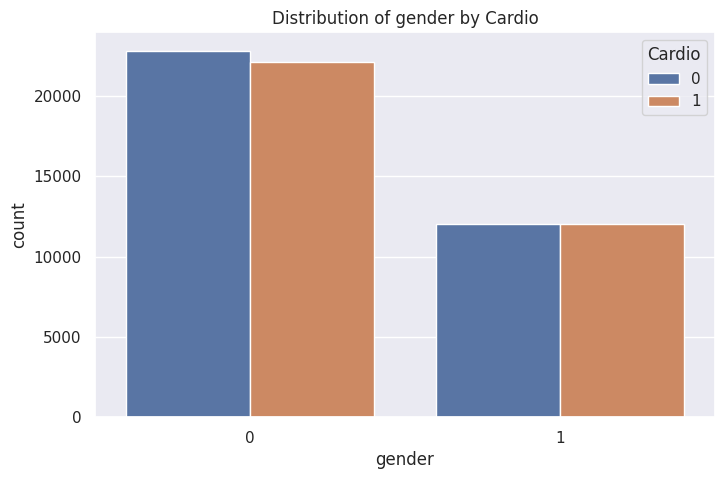

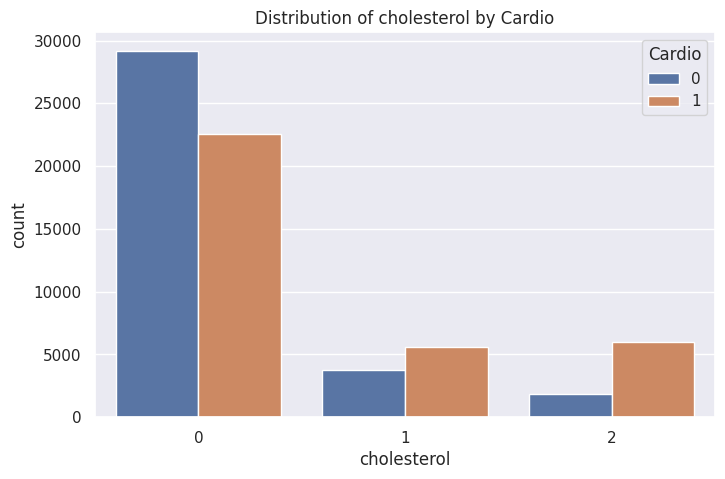

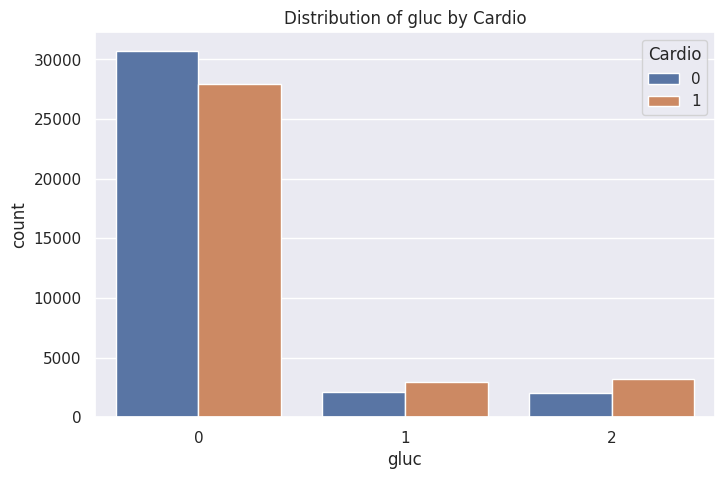

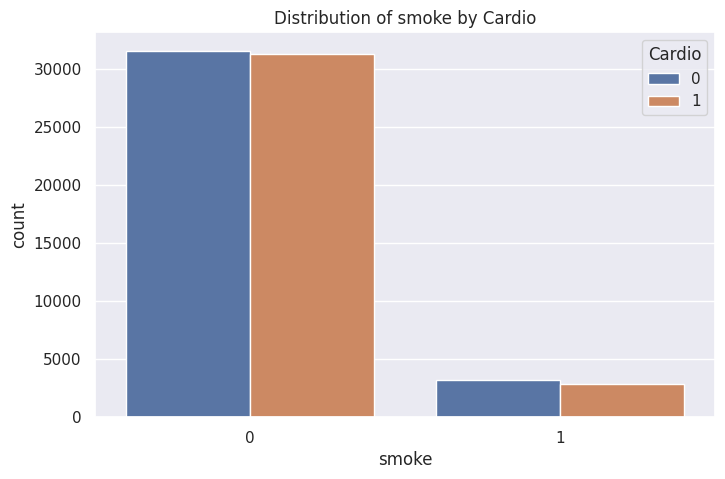

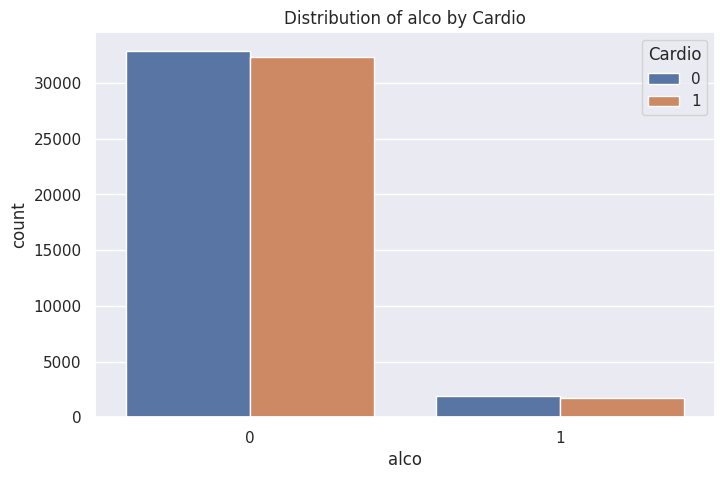

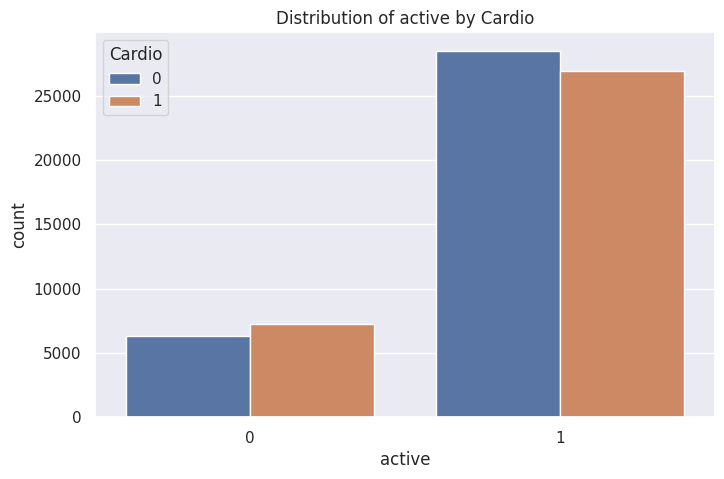

In [25]:
#Checking the disribution each discrete variable based on target variable
binary_features = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']

for feature in binary_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=feature, hue='cardio', data=df_filtered)
    plt.title(f'Distribution of {feature} by Cardio')
    plt.legend(title='Cardio')
    plt.show()

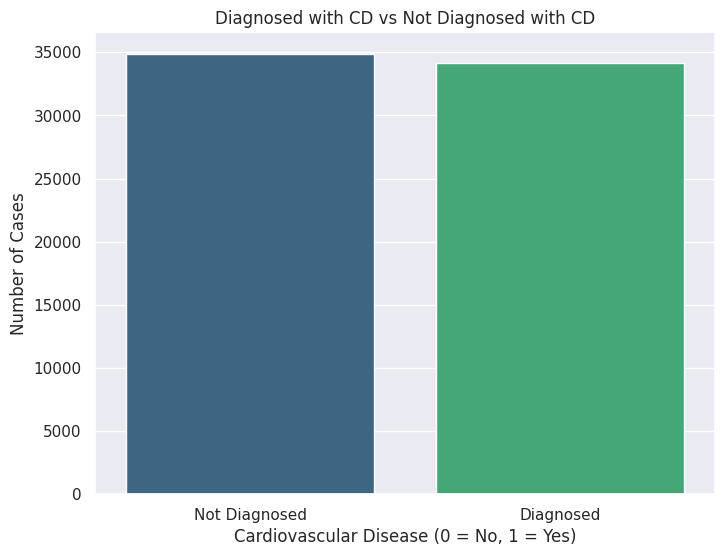

In [26]:
#Checking the representation of each class(0,1) in cardio feature
cardio_counts = df['cardio'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=cardio_counts.index, y=cardio_counts.values, palette='viridis')

plt.title('Diagnosed with CD vs Not Diagnosed with CD')
plt.xlabel('Cardiovascular Disease (0 = No, 1 = Yes)')
plt.ylabel('Number of Cases')
plt.xticks(ticks=[0, 1], labels=['Not Diagnosed', 'Diagnosed'])

plt.show()

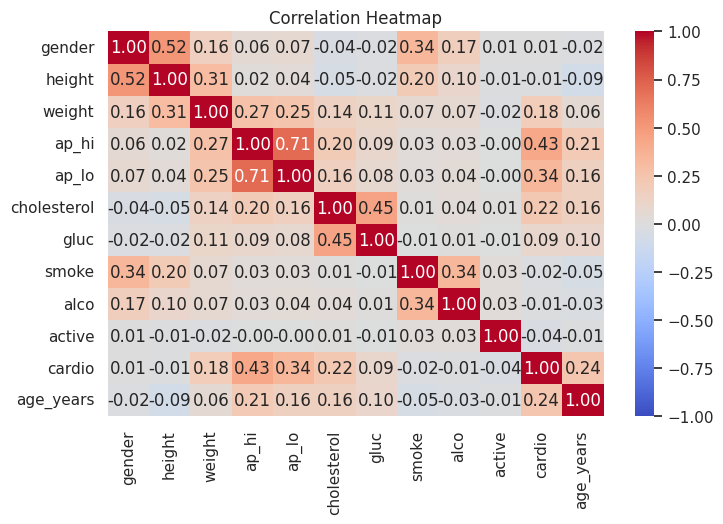

In [27]:
#Check for Multicolinearity
correlation_matrix = df_filtered.corr()

plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap')
plt.show()

# **Training The Model Using ANN**

In [28]:
#Scaling the data before feeding to ANN
scaler = MinMaxScaler()
df_filtered[features] = scaler.fit_transform(df_filtered[features])

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.metrics import Precision, Recall

In [30]:
#Lets split the data
X = df_filtered.drop('cardio', axis=1)
y = df_filtered['cardio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
#Creating model, note these hyperparameters and parameters provides best accuracy for this model as provided by keras autotuner
model = Sequential()

model.add(Dense(units=80, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(units=48, activation='relu'))
model.add(Dense(units=20, activation='relu'))

model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.00042972),
              loss='binary_crossentropy',
              metrics=['accuracy', Precision(), Recall()])

In [32]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/10
1380/1380 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6764 - loss: 0.6073 - precision: 0.6693 - recall: 0.7056 - val_accuracy: 0.7293 - val_loss: 0.5487 - val_precision: 0.7524 - val_recall: 0.6759
Epoch 2/10
1380/1380 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7290 - loss: 0.5539 - precision: 0.7378 - recall: 0.6968 - val_accuracy: 0.7321 - val_loss: 0.5443 - val_precision: 0.7405 - val_recall: 0.7068
Epoch 3/10
1380/1380 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7293 - loss: 0.5529 - precision: 0.7435 - recall: 0.6993 - val_accuracy: 0.7321 - val_loss: 0.5425 - val_precision: 0.7550 - val_recall: 0.6797
Epoch 4/10
1380/1380 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7307 - loss: 0.5479 - precision: 0.7447 - recall: 0.6891 - val_accuracy: 0.7339 - val_loss: 0.5417 - val_precision: 0.7496 - val_recall: 0.6949
Epoch 5/10
1380/1380 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7304 - loss: 0.5477 - precision: 0.7448 - recall: 0.6958 - val_accuracy: 0.7338 - va

In [33]:
test_loss, test_accuracy, test_precision, test_recall = model.evaluate(X_test, y_test)

y_pred = model.predict(X_test)
y_pred = np.round(y_pred).astype(int)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Test Precision: {test_precision:.4f}')
print(f'Test Recall: {test_recall:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7241 - loss: 0.5489 - precision: 0.7532 - recall: 0.6696
432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Test Loss: 0.5429
Test Accuracy: 0.7338
Test Precision: 0.7606
Test Recall: 0.6793
Precision: 0.7606
Recall: 0.6793
F1 Score: 0.7177


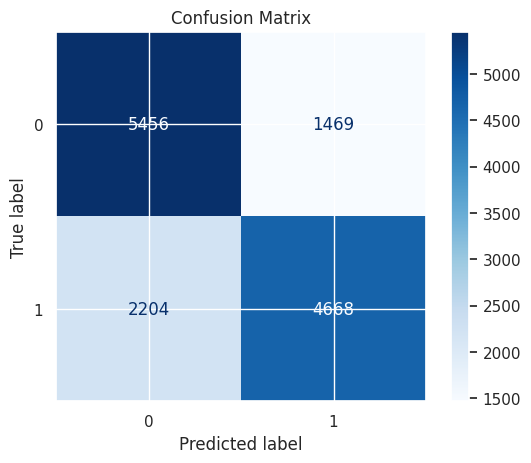

In [34]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# **Code For Hyperparameter Tuning**

**The code below can be used for hyperparameter tuning to search for the best optimal hyperparamets, you can continue with it.**

In [40]:
!pip install keras-tuner


import keras_tuner as kt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load or generate data (Example dataset for demonstration)
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Define the model building function for hyperparameter tuning
def build_model(hp):
    model = Sequential()
    # Tune the number of units in the first Dense layer
    model.add(Dense(
        units=hp.Int('units1', min_value=16, max_value=128, step=16),
        activation='relu',
        input_shape=(X_train.shape[1],)
    ))
    model.add(Dense(
        units=hp.Int('units2', min_value=8, max_value=64, step=8),
        activation='relu'
    ))
    model.add(Dense(
        units=hp.Int('units3', min_value=4, max_value=32, step=4),
        activation='relu'
    ))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(
        optimizer=Adam(
            learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-1, sampling='LOG')
        ),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

# Initialize the tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='my_dir',
    project_name='hyperparameter_tuning'
)

# Search for the best hyperparameters
tuner.search(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"""
Optimal number of units in the first dense layer: {best_hps.get('units1')}
Optimal number of units in the second dense layer: {best_hps.get('units2')}
Optimal number of units in the third dense layer: {best_hps.get('units3')}
Optimal learning rate: {best_hps.get('learning_rate')}
""")

# Build the model with the optimal hyperparameters
model = tuner.hypermodel.build(best_hps)

# Train the model with the optimal hyperparameters
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {accuracy}")


Trial 10 Complete [00h 00m 05s]
val_accuracy: 0.7749999761581421

Best val_accuracy So Far: 0.875
Total elapsed time: 00h 00m 41s

Optimal number of units in the first dense layer: 112
Optimal number of units in the second dense layer: 16
Optimal number of units in the third dense layer: 28
Optimal learning rate: 0.05369145353429052

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6531 - loss: 0.5818 - val_accuracy: 0.8250 - val_loss: 0.4296
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8922 - loss: 0.3183 - val_accuracy: 0.8450 - val_loss: 0.4852
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8712 - loss: 0.2803 - val_accuracy: 0.8500 - val_loss: 0.3923
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8927 - loss: 0.2415 - val_accuracy: 0.8200 - val_loss: 0.4650
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9081 - loss: 0.2281 - val_accuracy: 0.8350 - val_loss: 0.5291
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━

In [42]:
import keras_tuner as kt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load or generate data (Example dataset for demonstration)
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Define the model building function for hyperparameter tuning
def build_model(hp):
    model = Sequential()
    model.add(Dense(
        units=hp.Int('units1', min_value=16, max_value=128, step=16),
        activation='relu',
        input_shape=(X_train.shape[1],)
    ))
    model.add(Dense(
        units=hp.Int('units2', min_value=8, max_value=64, step=8),
        activation='relu'
    ))
    model.add(Dense(
        units=hp.Int('units3', min_value=4, max_value=32, step=4),
        activation='relu'
    ))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=Adam(
            learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-1, sampling='LOG')
        ),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

# Initialize the Hyperband tuner
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=50,
    hyperband_iterations=2,  # Number of times to repeat the Hyperband algorithm
    directory='my_dir',
    project_name='heart_disease_detection'
)

# Perform the search
tuner.search(X_train, y_train, epochs=50, validation_split=0.2, verbose=1)

# Retrieve the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
Optimal number of units in the first dense layer: {best_hps.get('units1')}
Optimal number of units in the second dense layer: {best_hps.get('units2')}
Optimal number of units in the third dense layer: {best_hps.get('units3')}
Optimal learning rate: {best_hps.get('learning_rate')}
""")

# Build the model with the optimal hyperparameters
model = tuner.hypermodel.build(best_hps)

# Train the model with the optimal hyperparameters
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {accuracy}")


Trial 180 Complete [00h 00m 11s]
val_accuracy: 0.893750011920929

Best val_accuracy So Far: 0.9312499761581421
Total elapsed time: 00h 15m 37s

Optimal number of units in the first dense layer: 16
Optimal number of units in the second dense layer: 64
Optimal number of units in the third dense layer: 32
Optimal learning rate: 0.02003711065882261

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6617 - loss: 0.5810 - val_accuracy: 0.8350 - val_loss: 0.3836
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8656 - loss: 0.3450 - val_accuracy: 0.8450 - val_loss: 0.4589
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8914 - loss: 0.2734 - val_accuracy: 0.8700 - val_loss: 0.3587
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9215 - loss: 0.2336 - val_accuracy: 0.8400 - val_loss: 0.3805
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9295 - loss: 0.2095 - val_accuracy: 0.8600 - val_loss: 0.3615
Epoch 6/50
25/25 ━━━━━

In [43]:
# Retrieve the best model from the tuner
best_model = tuner.get_best_models(num_models=1)[0]

# Display the summary of the best model
best_model.summary()

# Fine-tune the best model (optional, if needed)
# This step allows you to train the best model further on your dataset
history = best_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32)

# Evaluate the best model on the validation set
loss, accuracy = best_model.evaluate(X_val, y_val)
print(f"Validation Accuracy of the best model: {accuracy}")


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           1,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,537 (13.82 KB)

 Trainable params: 3,537 (13.82 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8617 - loss: 0.3891 - val_accuracy: 0.8850 - val_loss: 0.3532
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9094 - loss: 0.2677 - val_accuracy: 0.8750 - val_loss: 0.3581
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9079 - loss: 0.2784 - val_accuracy: 0.8750 - val_loss: 0.3749
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9129 - loss: 0.2333 - val_accuracy: 0.8700 - val_loss: 0.3731
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9092 - loss: 0.2202 - val_accuracy: 0.8500 - val_loss: 0.4121
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8960 - loss: 0.2471 - val_accuracy: 0.8550 - val_loss: 0.3851
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9290 - loss: 0.1921 - val_accuracy: 0.8450 - val_loss: 0.4219
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9589 - loss: 0.1434 - val_accuracy: 0.8250 - val_loss